In [22]:
import sys
import pygame
import keras
import tensorflow
from keras.layers import Conv2D, MaxPool2D, Flatten, TimeDistributed, LSTM, BatchNormalization
import random
import numpy as np
import pygame
from matplotlib import pyplot as plt

In [19]:
# Constants
SIZE = (36, 36)
CHANNELS = 3
NBOUT = 9
EPOCHS = 50

In [ ]:
def build_model(shape=(None, SIZE[0], SIZE[1], CHANNELS), nbout=NBOUT):
    # Build cnn
    cnn = keras.Sequential()
    cnn.add(Conv2D(8, (3, 3), input_shape=shape[1:], padding='same', activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(MaxPool2D())
    cnn.add(Conv2D(8, (5, 5), padding='same', activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(MaxPool2D())
    cnn.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(MaxPool2D())
    cnn.add(Flatten())

    # Build rnn
    rnn = keras.Sequential()
    rnn = LSTM(nbout, input_shape=shape[1:], activation='softmax')


    # Combine both
    main_input = keras.Input(shape=shape)
    model = TimeDistributed(cnn)(main_input)
    model = rnn(model)

    # Build final model
    final_model = keras.Model(inputs=main_input, outputs=model)
    print(final_model.summary())
    return final_model

In [34]:
train_inputs = np.load('train_inputs.npy', allow_pickle=True)
train_labels = np.load('train_labels.npy', allow_pickle=True)
train_labels = tensorflow.keras.utils.to_categorical(train_labels, 9)

#print(train_inputs.shape)

model = build_model()
opt = keras.optimizers.Adam(0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_inputs[:1000],
    train_labels[:1000],
    validation_split=0.1,
    verbose=1,
    epochs=EPOCHS,
    batch_size=10
)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, None, 36, 36, 3)] 0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 512)         6980      
_________________________________________________________________
lstm_8 (LSTM)                (None, 9)                 18792     
Total params: 25,772
Trainable params: 25,692
Non-trainable params: 80
_________________________________________________________________
None
Epoch 1/50
90/90 [==============================] - 13s 128ms/step - loss: 2.3789 - accuracy: 0.1424 - val_loss: 2.1043 - val_accuracy: 0.2600
Epoch 2/50
90/90 [==============================] - 12s 128ms/step - loss: 2.0034 - accuracy: 0.3333 - val_loss: 1.9301 - val_accuracy: 0.3500
Epoch 3/50
90/90 [==============================] - 13s 144ms/step - loss: 1.8328 - accuracy:

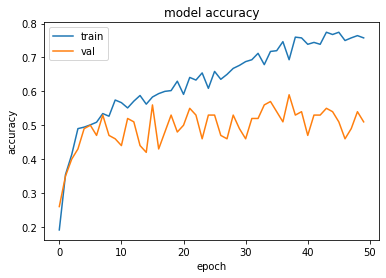

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

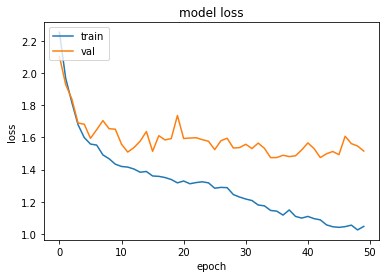

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()